<a href="https://colab.research.google.com/github/gigisy/ML_RF_KNN_DTC/blob/main/Statistics_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **DATA PREPARATION**

In [ ]:
# Import Dependencies
%matplotlib inline

# Start Python Imports
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import plotly.express as px
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning

from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
import pickle
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import RFE

# Let's ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

<ipython-input-1-48735d1d31e9>:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [ ]:
data = pd.read_csv('stroke dataset.csv')
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


## **DATA PRE-PROCESING**

### **MISSING VALUE**

In [ ]:
# Memeriksa Missing Value
data.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

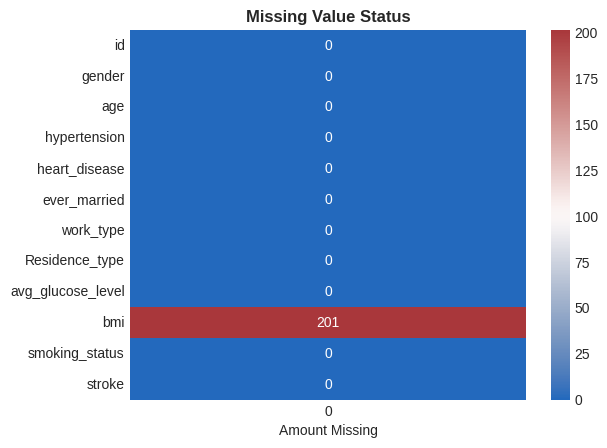

In [ ]:
plt.title('Missing Value Status',fontweight='bold')
ax = sns.heatmap(data.isna().sum().to_frame(),annot=True,fmt='d',cmap='vlag')
ax.set_xlabel('Amount Missing')
plt.show()

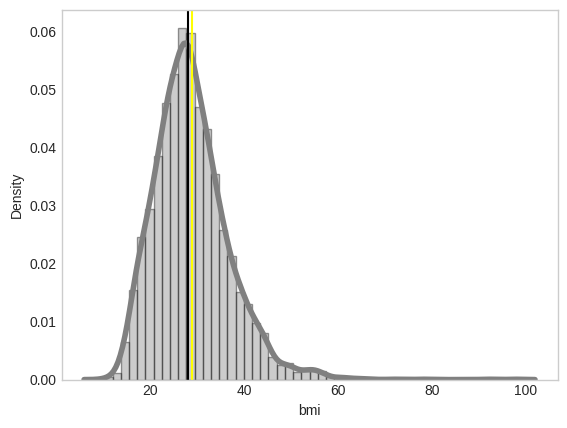

In [ ]:
# Karena ada missing value maka cek histogram utk mengecek median/mean nya
sns.distplot(data['bmi'], hist=True, kde=True,
             color = 'grey',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.axvline(data['bmi'].mean(),color='yellow')
plt.axvline(data['bmi'].median(),color='black')
plt.grid(False)
plt.show()

In [ ]:
# Mengganti missing value dengan mean
data['bmi'].median()

28.1

In [ ]:
# Imputasi dengan median
data.bmi = data.bmi.fillna(data.bmi.median())
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
# cek lagi missing value nya
np.sum(data.isnull())

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

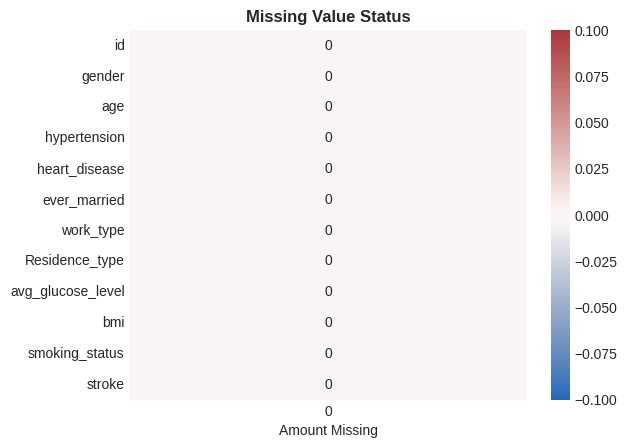

In [ ]:
# cek lagi missing value nya
plt.title('Missing Value Status',fontweight='bold')
ax =sns.heatmap(data.isna().sum().to_frame(),annot=True,fmt='d',cmap='vlag')
ax.set_xlabel('Amount Missing')
plt.show()

### **DUPLICATED VALUE**

In [ ]:
# Memeriksa Data Duplikat
print('Jumlah Duplikasi :', data.duplicated().sum())
data.describe()

Jumlah Duplikasi : 0


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.862035,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.699562,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


### **CHECK OUTLIER**


Persebaran data sebelum ditangani Outlier: 
                 id       gender          age  hypertension  heart_disease  \
count   5109.000000  5109.000000  5109.000000   5109.000000    5109.000000   
mean   36513.985516     0.413975    43.229986      0.097475       0.054022   
std    21162.008804     0.492592    22.613575      0.296633       0.226084   
min       67.000000     0.000000     0.080000      0.000000       0.000000   
25%    17740.000000     0.000000    25.000000      0.000000       0.000000   
50%    36922.000000     0.000000    45.000000      0.000000       0.000000   
75%    54643.000000     1.000000    61.000000      0.000000       0.000000   
max    72940.000000     1.000000    82.000000      1.000000       1.000000   

       ever_married    work_type  Residence_type  avg_glucose_level  \
count   5109.000000  5109.000000     5109.000000        5109.000000   
mean       0.656293     2.167743        0.508123         106.140399   
std        0.474991     1.090398       

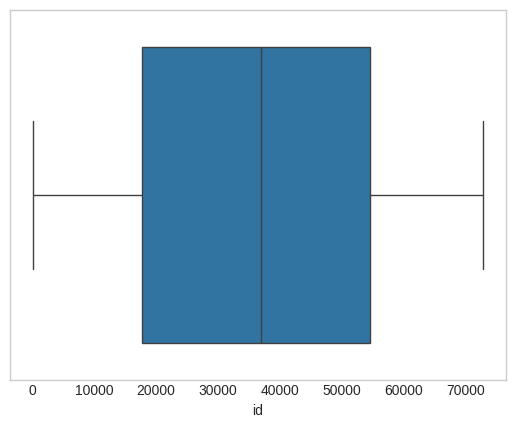

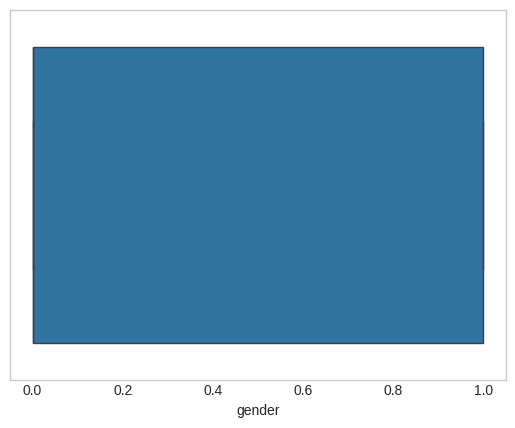

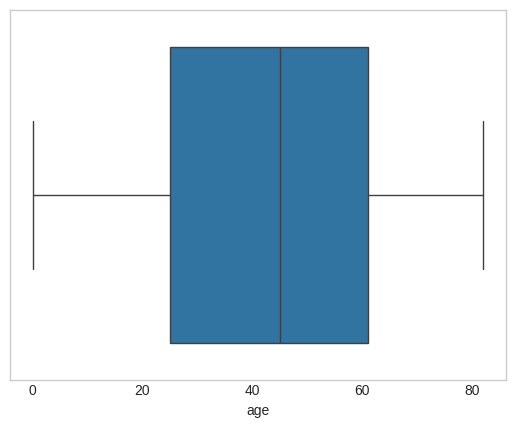

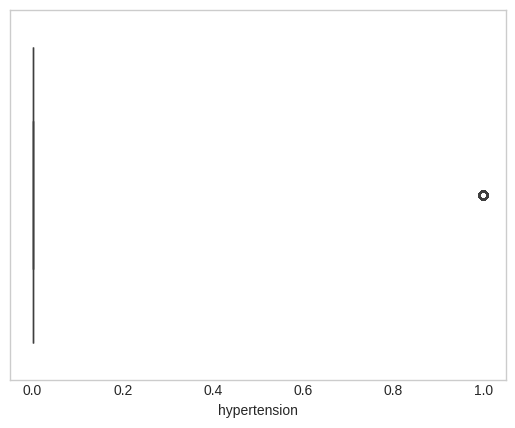

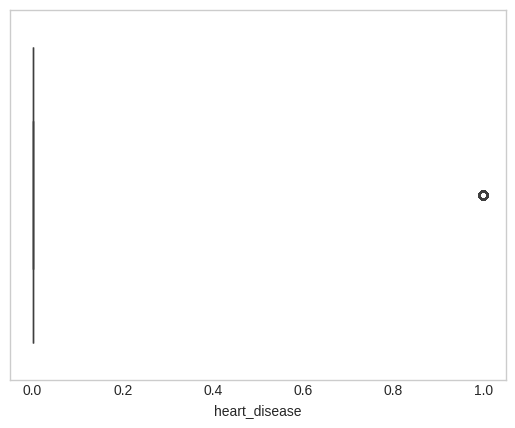

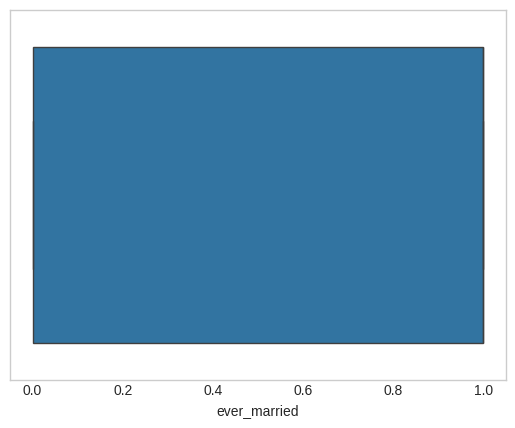

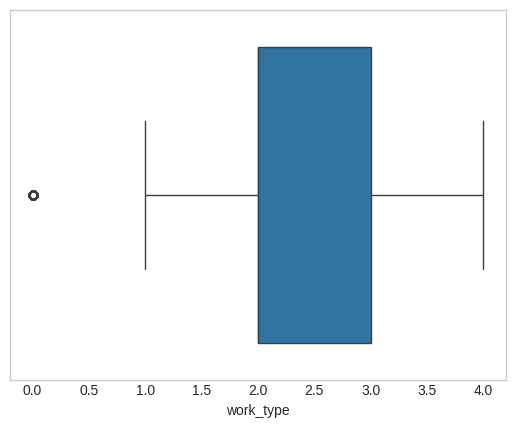

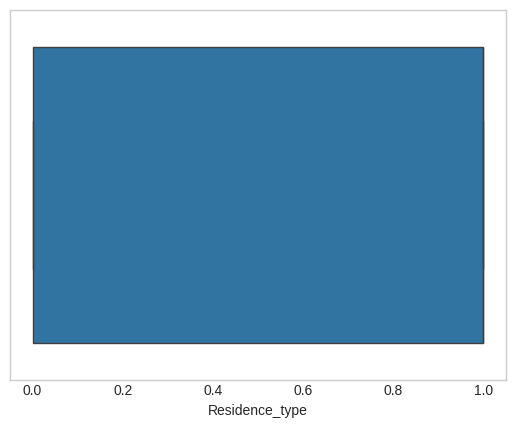

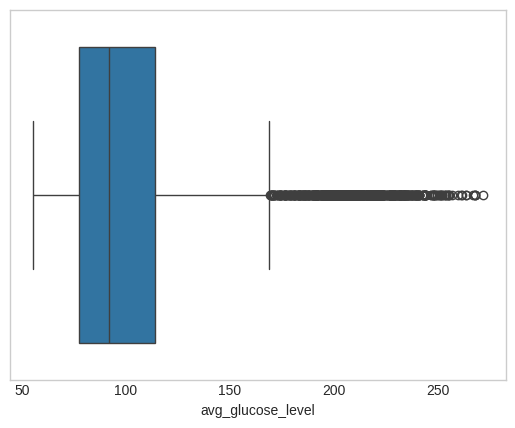

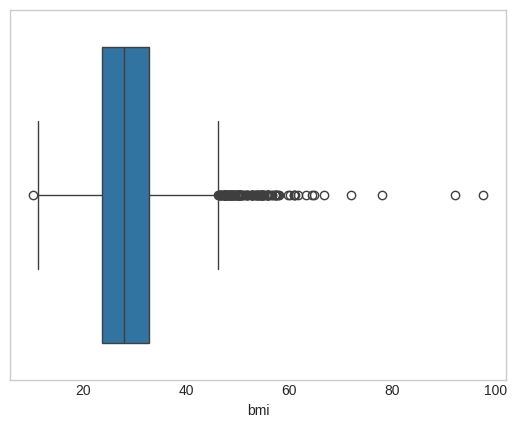

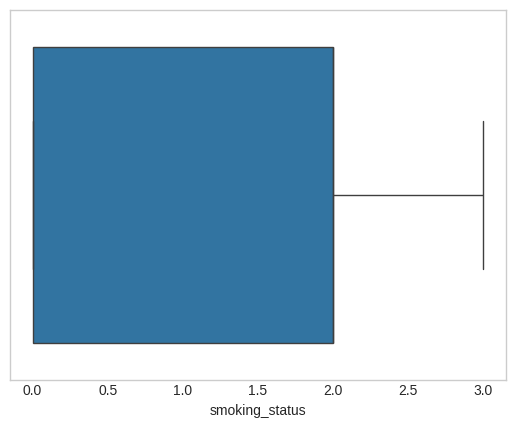

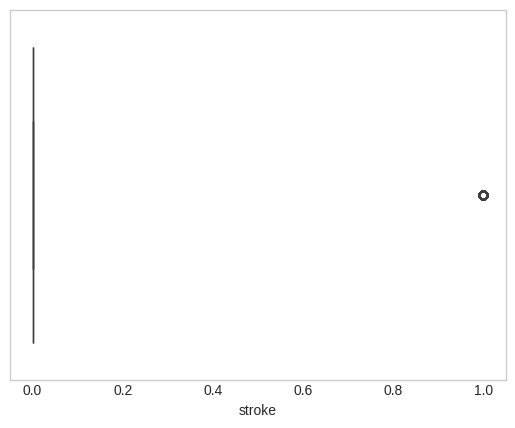

In [ ]:
#Pengecekan Outliers
print('\nPersebaran data sebelum ditangani Outlier: ')
print(data[['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']].describe())
# Creating Box Plot
# Masukkan variable
plt.figure() # untuk membuat figure baru
sns.boxplot(x=data['id'])
plt.grid(False)
plt.show()
plt.figure() # untuk membuat figure baru
sns.boxplot(x=data['gender'])
plt.grid(False)
plt.show()
plt.figure() # untuk membuat figure baru
sns.boxplot(x=data['age'])
plt.grid(False)
plt.show()
plt.figure() # untuk membuat figure baru
sns.boxplot(x=data['hypertension'])
plt.grid(False)
plt.show()
plt.figure() # untuk membuat figure baru
sns.boxplot(x=data['heart_disease'])
plt.grid(False)
plt.show()
plt.figure() # untuk membuat figure baru
sns.boxplot(x=data['ever_married'])
plt.grid(False)
plt.show()
plt.figure() # untuk membuat figure baru
sns.boxplot(x=data['work_type'])
plt.grid(False)
plt.show()
plt.figure() # untuk membuat figure baru
sns.boxplot(x=data['Residence_type'])
plt.grid(False)
plt.show()
plt.figure() # untuk membuat figure baru
sns.boxplot(x=data['avg_glucose_level'])
plt.grid(False)
plt.show()
plt.figure() # untuk membuat figure baru
sns.boxplot(x=data['bmi'])
plt.grid(False)
plt.show()
plt.figure() # untuk membuat figure baru
sns.boxplot(x=data['smoking_status'])
plt.grid(False)
plt.show()
plt.figure() # untuk membuat figure baru
sns.boxplot(x=data['stroke'])
plt.grid(False)
plt.show()

Variabel yang memiliki outlier:


*   Variabel indeks massa tubuh pasien (bmi)
*   Variabel rata-rata kadar glukosa pasien dalam darah (avg_glucose_level)


## **STATISTIKA DESKRIPTIF**

In [ ]:
data['gender'].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [ ]:
data = data[data['gender'] != 'Other']
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
data['gender'].value_counts()

gender
Female    2994
Male      2115
Name: count, dtype: int64

In [ ]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000
mean,36513.985516,43.229986,0.097475,0.054022,106.140399,28.863300,0.048738
std,21162.008804,22.613575,0.296633,0.226084,45.285004,7.699785,0.215340
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17740.000000,25.000000,0.000000,0.000000,77.240000,23.800000,0.000000
50%,36922.000000,45.000000,0.000000,0.000000,91.880000,28.100000,0.000000
75%,54643.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
data.describe(exclude = np.number)

,gender,ever_married,work_type,Residence_type,smoking_status
count,5109,5109,5109,5109,5109
unique,2,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2924,2596,1892


## **VISUALISASI DAN LABEL ENCODING**

### Pie Chart

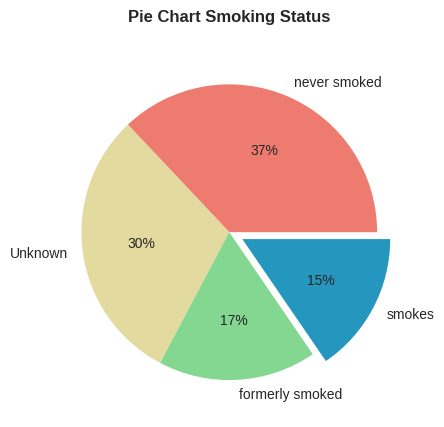

In [ ]:
ax = plt.axes()
ax.pie(data['smoking_status'].value_counts(), labels = data['smoking_status'].value_counts().index, autopct='%.0f%%', colors = ("#ee7b70", "#e2da9e", "#84d791", "#2596be"), explode = (0,0,0,0.1))
ax.set_title('Pie Chart Smoking Status\n', fontsize = 12, fontweight = 'bold')
plt.show()

### Bar Chart

In [ ]:
data['work_type'].value_counts()

work_type
Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

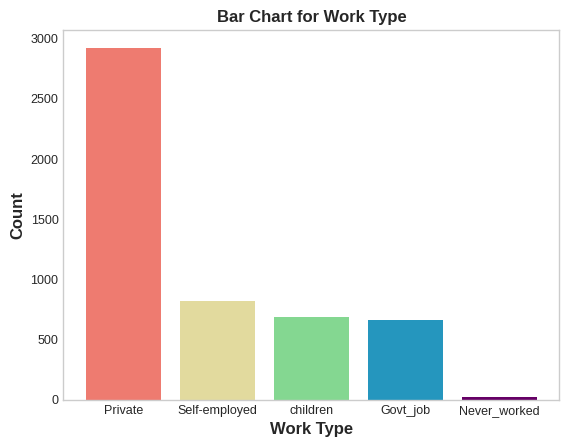

In [ ]:
plt.bar(["Private", "Self-employed", "children", "Govt_job", "Never_worked"], data['work_type'].value_counts(), color = ["#ee7b70", "#e2da9e", "#84d791", "#2596be", "#660066"])
plt.xlabel('Work Type', fontsize = 12, fontweight = 'bold')
plt.ylabel('Count', fontsize = 12, fontweight = 'bold')
plt.title('Bar Chart for Work Type', fontsize = 12, fontweight = 'bold')
plt.xticks(fontsize = 9)
plt.yticks(fontsize = 9)
plt.grid(False)
plt.show()

###Histogram

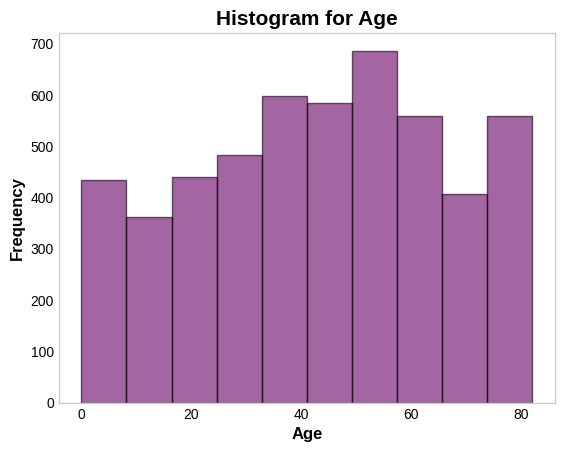

In [ ]:
bin_width = 0.2
bins = int((data.age.max()-data.age.min())/bin_width)
plt.hist(data.age, color = "#660066", alpha = 0.6,
         orientation = "vertical", rwidth = 1, edgecolor='black')
plt.xlabel("Age", size = 12, color = "black", fontweight = 'bold')
plt.ylabel("Frequency", size = 12, color = "black", fontweight = 'bold')
plt.title("Histogram for Age", size =15, color = "black", fontweight = 'bold')
plt.xticks(color = "black")
plt.yticks(color = "black")
plt.grid(False)
plt.show()

### **LABEL ENCODING**

In [ ]:
# Using LabelEncoder for all categorical features
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
label_encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

In [ ]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.1,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,2,1,83.75,28.1,2,0
5106,44873,0,81.0,0,0,1,3,1,125.20,40.0,2,0
5107,19723,0,35.0,0,0,1,3,0,82.99,30.6,2,0
5108,37544,1,51.0,0,0,1,2,0,166.29,25.6,1,0


###Pair Plot

In [ ]:
data2 = data.drop(["id", "hypertension", "heart_disease", "ever_married", "work_type", "Residence_type", "smoking_status", "stroke"], axis=1)
data2

,gender,age,avg_glucose_level,bmi
0,1,67.0,228.69,36.6
1,0,61.0,202.21,28.1
2,1,80.0,105.92,32.5
3,0,49.0,171.23,34.4
4,0,79.0,174.12,24.0
...,...,...,...,...
5105,0,80.0,83.75,28.1
5106,0,81.0,125.20,40.0
5107,0,35.0,82.99,30.6
5108,1,51.0,166.29,25.6


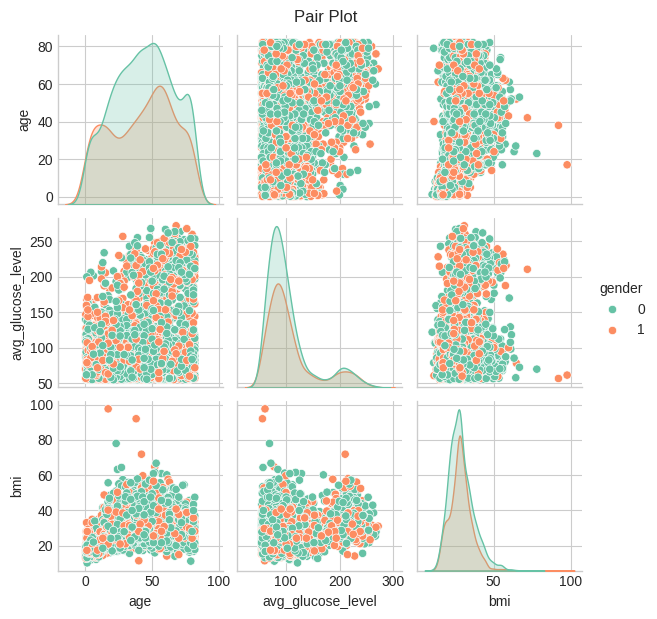

In [ ]:
pair_plot = sns.pairplot(data2, hue="gender", height=2, palette='Set2')
pair_plot.fig.suptitle("Pair Plot", y=1.02)
plt.show()

###Heat Map

In [ ]:
data3 = data.drop("id", axis = 1)
data3

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,28.1,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.1,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.0,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.6,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.6,1,0


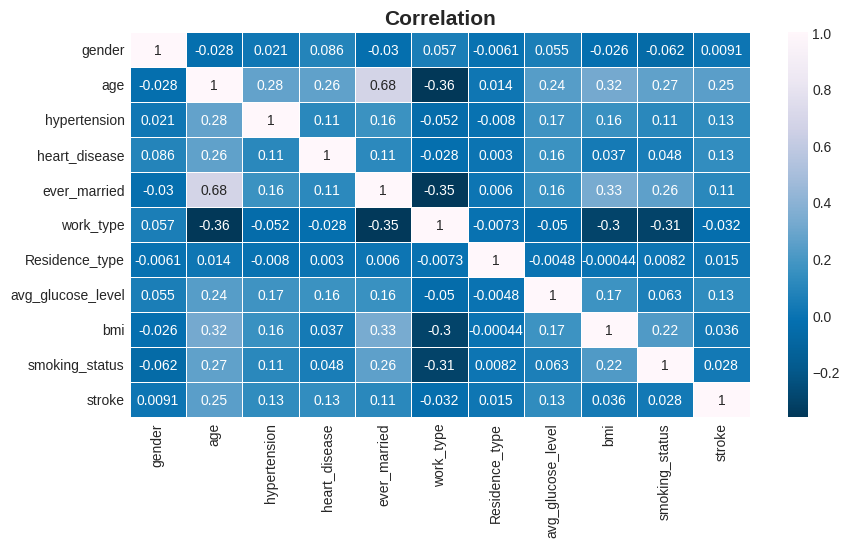

In [ ]:
plt.figure(figsize=(10, 5))
heatmap = sns.heatmap(data3.corr(),
                      linewidths=.5,annot=True,cmap='PuBu_r', annot_kws={"size": 10})
heatmap.set_title('Correlation', fontsize=15, fontweight = 'bold')
heatmap.tick_params(axis='both', which='major', labelsize=10)
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=10)

## **MODELLING**

In [ ]:
x = data.drop(columns=["id","stroke"])
y = data.stroke

Splitting Training and Test Set

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=42, test_size = 0.2)
print(x_train.shape, x_test.shape)

(4087, 10) (1022, 10)


Scalling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc1 = StandardScaler()

In [ ]:
# Scaling X train
x_train = sc1.fit_transform(x_train)

# Scaling X test
x_test = sc1.transform(x_test)

## **RANDOM FOREST CLASSIFIER**

**📌LEARNING CURVES MODEL MACHINE LEARNING RANDOM FOREST📌**

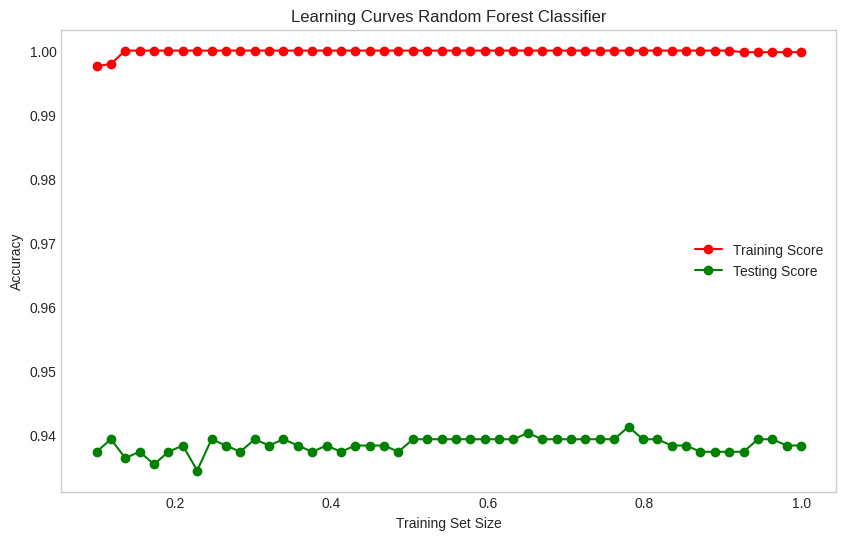

In [ ]:
#used to devide
train_sizes = np.linspace(0.1, 1, 50)
learning_curve_train = []
learning_curve_test = []

rfc = RandomForestClassifier(n_estimators = 100, random_state=42)

for train_size in train_sizes:
    num_samples = int(train_size * len(x_train))
    x_subset = x_train[:num_samples]
    y_subset = y_train[:num_samples]

    rfc.fit(x_subset, y_subset)

    y_pred_train = rfc.predict(x_subset)
    acc_train = accuracy_score(y_subset, y_pred_train)
    learning_curve_train.append(acc_train)

    y_pred_test = rfc.predict(x_test)
    acc_test = accuracy_score(y_test, y_pred_test)
    learning_curve_test.append(acc_test)

# Plot Learning Curves
plt.figure(figsize=(10, 6))
plt.title('Learning Curves Random Forest Classifier')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.grid()
plt.plot(train_sizes, learning_curve_train, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, learning_curve_test, 'o-', color="g", label="Testing Score")
plt.legend(loc="best")
plt.show()

In [ ]:
# Rata-rata nilai learning curves model Random Forest
average_train_rf = np.mean(learning_curve_train)
average_test_rf = np.mean(learning_curve_test)
print("Rata-rata nilai learning curve train:", average_train_rf)
print("Rata-rata nilai learning curve test:", average_test_rf)

Rata-rata nilai learning curve train: 0.9998841487458187
Rata-rata nilai learning curve test: 0.9384931506849316


**📌CROSS VALIDATION PADA MODEL MACHINE LEARNING RANDOM FOREST📌**

In [ ]:
# CROSS VALIDATION
rfc = RandomForestClassifier(n_estimators = 100, random_state=42)

cv_score = cross_val_score(rfc, x, y, cv=10)
print("Cross Validation Score")
print(cv_score)

#predict using cross validation
y_pred = cross_val_predict(rfc, x, y, cv=3)
mean_cv_rf = np.mean(cv_score)
print("Rata-rata nilai Cross Validation: ", mean_cv_rf)

Cross Validation Score
[0.95107632 0.94911937 0.94911937 0.94911937 0.94520548 0.94911937
 0.95107632 0.95107632 0.95107632 0.95098039]
Rata-rata nilai Cross Validation:  0.9496968650473887


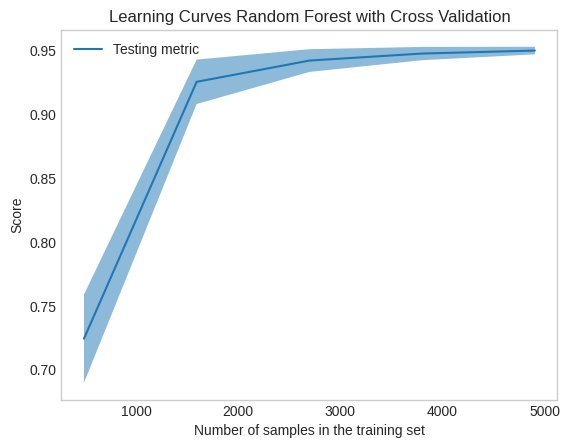

In [ ]:
#MENAMPILKAN LEARNING CURVE DENGAN CROSS VALIDATION
from sklearn.model_selection import LearningCurveDisplay, learning_curve

rfe_selector = RandomForestClassifier(random_state=42)
train_sizes, train_scores, test_scores = learning_curve(
    rfc, x, y, cv=25)
display = LearningCurveDisplay(train_sizes=train_sizes,
    train_scores=train_scores, test_scores=test_scores, score_name="Score")
display.plot()
plt.title('Learning Curves Random Forest with Cross Validation')
plt.grid(False)
plt.show()

In [ ]:
# Rata-rata nilai learning curves model Random Forest

average_train_rf = np.mean(train_scores)
average_test_rf = np.mean(test_scores)
print("Rata-rata nilai train score Random Forest:", average_train_rf)
print("Rata-rata nilai test score Random Forest:", average_test_rf)

Rata-rata nilai train score Random Forest: 1.0
Rata-rata nilai test score Random Forest: 0.8976690578670493


**📌HYPERPARAMETER TUNING PADA MODEL MACHINE LEARNING RANDOM FOREST📌**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score

# Definisikan model
rf = RandomForestClassifier(random_state=42)

# Definisikan rentang hyperparameter yang akan diselidiki untuk Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inisialisasi objek GridSearchCV untuk Random Forest
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5)
grid_search_rf.fit(x_train, y_train)
print("Best Hyperparameters for Random Forest:", grid_search_rf.best_params_)

# Evaluasi model terbaik pada data uji untuk Random Forest
best_model_rf = grid_search_rf.best_estimator_
y_pred_rf = best_model_rf.predict(x_test)
accuracy_rf = best_model_rf.score(x_test, y_test)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
print("Random Forest Model Accuracy:", accuracy_rf)
print("Random Forest Precision:", precision_rf)
print("Random Forest Recall:", recall_rf)
print("Random Forest F1 Score:", f1_rf)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Best Hyperparameters for Random Forest: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Random Forest Model Accuracy: 0.9393346379647749
Random Forest Precision: 0.8823495620804148
Random Forest Recall: 0.9393346379647749
Random Forest F1 Score: 0.9099508097337881
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



## **KNN (K-NEAREST NEIGHBOUR)**

**📌LEARNING CURVES MODEL MACHINE LEARNING KNN (K-NEAREST NEIGHBOUR)📌**

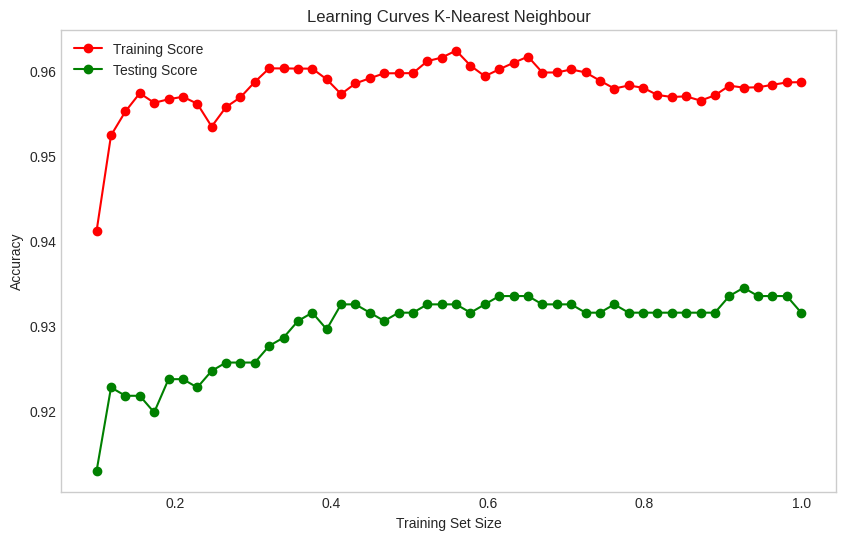

In [ ]:
#used to devide
train_sizes = np.linspace(0.1, 1, 50)
learning_curve_train = []
learning_curve_test = []

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train,y_train)

for train_size in train_sizes:
    num_samples = int(train_size * len(x_train))
    x_subset = x_train[:num_samples]
    y_subset = y_train[:num_samples]

    knn.fit(x_subset, y_subset)

    y_pred_train = knn.predict(x_subset)
    acc_train = accuracy_score(y_subset, y_pred_train)
    learning_curve_train.append(acc_train)

    y_pred_test = knn.predict(x_test)
    acc_test = accuracy_score(y_test, y_pred_test)
    learning_curve_test.append(acc_test)

# Plot Learning Curves
plt.figure(figsize=(10, 6))
plt.title('Learning Curves K-Nearest Neighbour')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.grid()
plt.plot(train_sizes, learning_curve_train, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, learning_curve_test, 'o-', color="g", label="Testing Score")
plt.legend(loc="best")
plt.show()

In [ ]:
# Rata-rata nilai learning curves model K-Nearest Neighbour
average_train_knn = np.mean(learning_curve_train)
average_test_knn = np.mean(learning_curve_test)
print("Rata-rata nilai learning curve train:", average_train_knn)
print("Rata-rata nilai learning curve test:", average_test_knn)

Rata-rata nilai learning curve train: 0.9581041253582019
Rata-rata nilai learning curve test: 0.9296673189823876


**📌CROSS VALIDATION PADA MODEL MACHINE LEARNING KNN (K-NEAREST NEIGHBOUR)📌**

In [ ]:
# CROSS VALIDATION

cv_score = cross_val_score(knn, x, y, cv=10)
print("Cross Validation Score")
print(cv_score)

#predict using cross validation
y_pred = cross_val_predict(knn, x, y, cv=3)
mean_cv_knn = np.mean(cv_score)
print("Rata-rata nilai Cross Validation: ", mean_cv_knn)

Cross Validation Score
[0.9334638  0.9334638  0.93933464 0.9334638  0.9295499  0.93542074
 0.93933464 0.95107632 0.94324853 0.93529412]
Rata-rata nilai Cross Validation:  0.9373650282030621


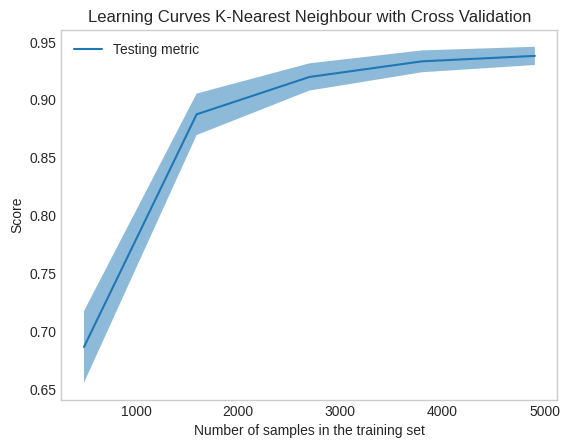

In [ ]:
#MENAMPILKAN LEARNING CURVE DENGAN CROSS VALIDATION


from sklearn.model_selection import LearningCurveDisplay, learning_curve

knn = KNeighborsClassifier(n_neighbors = 3)
train_sizes, train_scores, test_scores = learning_curve(
    knn, x, y, cv=25)
display = LearningCurveDisplay(train_sizes=train_sizes,
    train_scores=train_scores, test_scores=test_scores, score_name="Score")
display.plot()
plt.title('Learning Curves K-Nearest Neighbour with Cross Validation')
plt.grid(False)
plt.show()

In [ ]:
# Rata-rata nilai learning curves model KNN (K-Nearest Neighbour)

average_train_knn = np.mean(train_scores)
average_test_knn = np.mean(test_scores)
print("Rata-rata nilai train score KNN:", average_train_knn)
print("Rata-rata nilai test score KNN:", average_test_knn)

Rata-rata nilai train score KNN: 0.9166395637482262
Rata-rata nilai test score KNN: 0.8727684361549498


**📌HYPERPARAMETER TUNING PADA MODEL MACHINE LEARNING KNN📌**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score

# Definisikan model
knn = KNeighborsClassifier()

# Definisikan rentang hyperparameter yang akan diselidiki untuk KNN
param_grid_knn = {
    'n_neighbors': range(1, 21),
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Inisialisasi objek GridSearchCV untuk KNN
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=5)
grid_search_knn.fit(x_train, y_train)
print("Best Hyperparameters for KNN:", grid_search_knn.best_params_)

# Evaluasi model terbaik pada data uji untuk KNN
best_model_knn = grid_search_knn.best_estimator_
y_pred_knn = best_model_knn.predict(x_test)
accuracy_knn = best_model_knn.score(x_test, y_test)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')
print("KNN Model Accuracy:", accuracy_knn)
print("KNN Precision:", precision_knn)
print("KNN Recall:", recall_knn)
print("KNN F1 Score:", f1_knn)
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

Best Hyperparameters for KNN: {'metric': 'manhattan', 'n_neighbors': 4}
KNN Model Accuracy: 0.9393346379647749
KNN Precision: 0.8823495620804148
KNN Recall: 0.9393346379647749
KNN F1 Score: 0.9099508097337881
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



## **DECISION TREE**

📌**LEARNING CURVES MODEL MACHINE LEARNING DECISION TREE**
📌

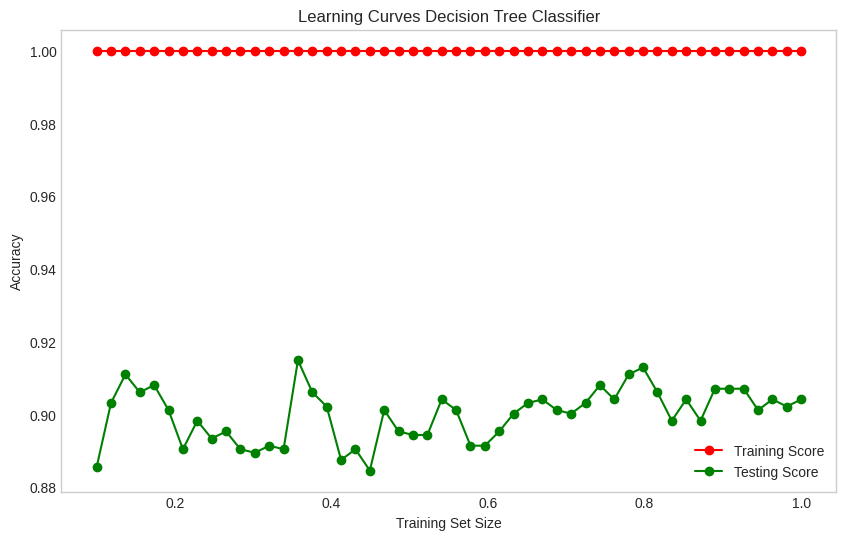

In [ ]:
from sklearn.tree import DecisionTreeClassifier

#used to devide
train_sizes = np.linspace(0.1, 1, 50)
learning_curve_train = []
learning_curve_test = []

dtc = DecisionTreeClassifier(random_state=42)

for train_size in train_sizes:
    num_samples = int(train_size * len(x_train))
    x_subset = x_train[:num_samples]
    y_subset = y_train[:num_samples]

    dtc.fit(x_subset, y_subset)

    y_pred_train = dtc.predict(x_subset)
    acc_train = accuracy_score(y_subset, y_pred_train)
    learning_curve_train.append(acc_train)

    y_pred_test = dtc.predict(x_test)
    acc_test = accuracy_score(y_test, y_pred_test)
    learning_curve_test.append(acc_test)

# Plot Learning Curves
plt.figure(figsize=(10, 6))
plt.title('Learning Curves Decision Tree Classifier')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.grid()
plt.plot(train_sizes, learning_curve_train, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, learning_curve_test, 'o-', color="g", label="Testing Score")
plt.legend(loc="best")
plt.show()

In [ ]:
# Rata-rata nilai learning curves model machine learning Decision Tree
average_train_dtc = np.mean(learning_curve_train)
average_test_dtc = np.mean(learning_curve_test)
print("Rata-rata nilai learning curve train:", average_train_dtc)
print("Rata-rata nilai learning curve test:", average_test_dtc)

Rata-rata nilai learning curve train: 1.0
Rata-rata nilai learning curve test: 0.8999021526418788


📌**CROSS VALIDATION PADA MODEL MACHINE LEARNING DECISION TREE**📌

In [ ]:
# CROSS VALIDATION

dtc = DecisionTreeClassifier(random_state=42)

cv_score = cross_val_score(dtc, x, y, cv=10)
print("Cross Validation Score")
print(cv_score)

#predict using cross validation
y_pred = cross_val_predict(dtc, x, y, cv=3)

mean_cv_dtc = np.mean(cv_score)
print("Cross Validation Decision Tree: ",mean_cv_dtc)

Cross Validation Score
[0.91389432 0.91389432 0.90606654 0.90998043 0.8962818  0.90215264
 0.91389432 0.9295499  0.91976517 0.92156863]
Cross Validation Decision Tree:  0.9127048079505775


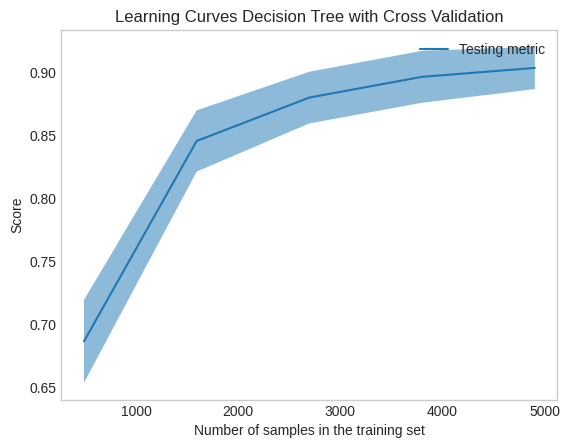

In [ ]:
#MENAMPILKAN LEARNING CURVE DENGAN CROSS VALIDATION


from sklearn.model_selection import LearningCurveDisplay, learning_curve


dtc = DecisionTreeClassifier(random_state=42)
train_sizes, train_scores, test_scores = learning_curve(
    dtc, x, y, cv=25)
display = LearningCurveDisplay(train_sizes=train_sizes,
    train_scores=train_scores, test_scores=test_scores, score_name="Score")
display.plot()
plt.title('Learning Curves Decision Tree with Cross Validation')
plt.grid(False)
plt.show()

In [ ]:
# Rata-rata nilai learning curves model Decision Tree
# dtc = Decision Tree Classifier
average_train_dtc = np.mean(train_scores)
average_test_dtc = np.mean(test_scores)
print("Rata-rata nilai train score Decision Tree:", average_train_dtc)
print("Rata-rata nilai test score Decision Tree:", average_test_dtc)

Rata-rata nilai train score Decision Tree: 1.0
Rata-rata nilai test score Decision Tree: 0.842430224772836


📌**HYPERPARAMETER TUNING PADA MODEL MACHINE LEARNING DECISION TREE**📌

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

# Definisikan model Decision Tree
dtc = DecisionTreeClassifier(random_state=42)

# Definisikan rentang hyperparameter yang akan diselidiki
param_grid_dt = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inisialisasi objek GridSearchCV
grid_search_dt = GridSearchCV(estimator=dtc, param_grid=param_grid_dt, cv=5)

# Lakukan pencarian grid pada data latih
grid_search_dt.fit(x_train, y_train)

# Tampilkan kombinasi hyperparameter terbaik
print("Best Hyperparameters:", grid_search_dt.best_params_)

# Evaluasi kinerja model terbaik pada data uji
best_model_dt = grid_search_dt.best_estimator_

# Prediksi pada data uji
y_pred_dt = best_model_dt.predict(x_test)

# Hitung nilai precision, recall, dan F1-score
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
f1_score_dt = f1_score(y_test, y_pred_dt, average='weighted')

# Tampilkan hasil evaluasi
print("Model Accuracy:", accuracy_dt)
print("Model Precision:", precision_dt)
print("Model Recall:", recall_dt)
print("Model F1-Score:", f1_score_dt)
print(classification_report(y_test, y_pred_dt))

Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Model Accuracy: 0.9363992172211351
Model Precision: 0.8821817944379682
Model Recall: 0.9363992172211351
Model F1-Score: 0.9084823128168668
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



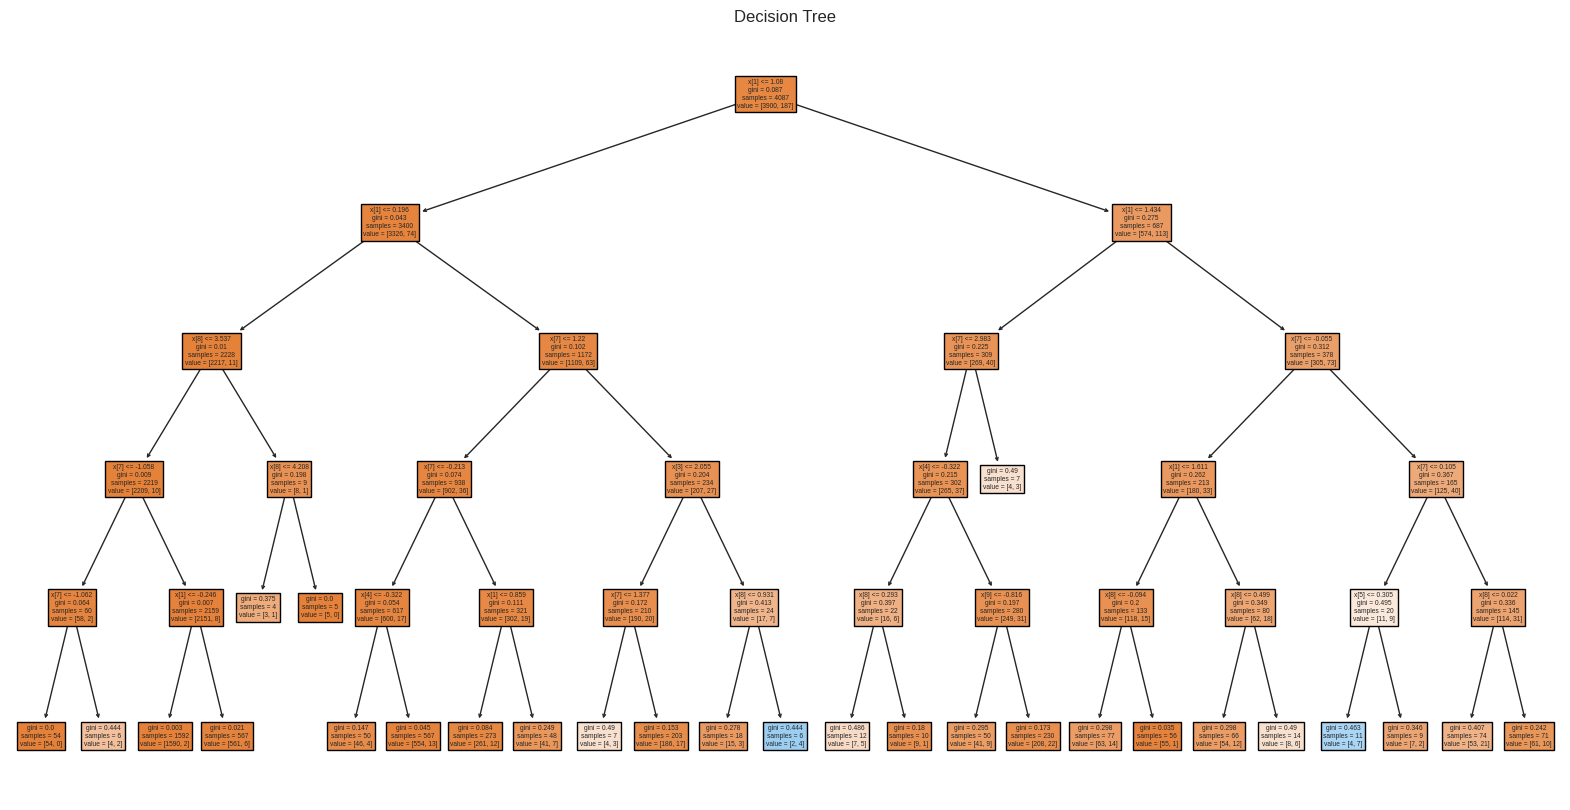

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

#plot decission tree
plt.figure(figsize=(20, 10))
plot_tree(best_model_dt, filled=True)
plt.title("Decision Tree")
plt.show()

## ***COMPARISON BETWEEN MODELS***

In [ ]:
model_comparison = pd.DataFrame({'Random Forest':[accuracy_rf, precision_rf, recall_rf, f1_score_rf],
                              'KNN': [accuracy_knn, precision_knn, recall_knn, f1_score_knn],
                                 'Decision Tree': [accuracy_dt, precision_dt, recall_dt, f1_score_dt]},
                              index=['Accuracy','Precision', 'Recall', 'F1 Score'])
model_comparison

,Random Forest,KNN,Decision Tree
Accuracy,0.939335,0.939335,0.936399
Precision,0.882350,0.882350,0.882182
Recall,0.939335,0.939335,0.936399
F1 Score,0.909951,0.909951,0.908482
